## 12球団の200打席以上選手
## ホームラン率
## 四死球率 →相関関係
## 外れ値の選手を出す

In [9]:
# stats_bat.csvを読み込む
import pandas as pd
df = pd.read_csv('stats_bat.csv', encoding='latin1')
# ab , hr , bb, hbp　,pa列を抽出
df_selected = df[['ab', 'hr', 'bb', 'hbp', 'pa']]
# ab/hr , bb+hbp/paを計算
df_selected['ab_per_hr'] = df_selected['ab'] / df_selected['hr']
df_selected['bb_hbp_per_pa'] = (df_selected['bb'] + df_selected['hbp']) / df_selected['pa']
# 結果を表示
print(df_selected)


       ab  hr  bb  hbp   pa  ab_per_hr  bb_hbp_per_pa
0     181   6   9    3  195  30.166667       0.061538
1       0   0   0    0    0        NaN            NaN
2     186   3  13    2  206  62.000000       0.072816
3      22   0   1    0   23        inf       0.043478
4      48   1   4    0   54  48.000000       0.074074
...   ...  ..  ..  ...  ...        ...            ...
3517    0   0   0    0    0        NaN            NaN
3518    1   0   0    0    1        inf       0.000000
3519    0   0   0    0    0        NaN            NaN
3520    0   0   0    0    0        NaN            NaN
3521    2   0   0    0    2        inf       0.000000

[3522 rows x 7 columns]


/var/folders/_0/_t48q9ss5vxdrcldcy9kkrjh0000gn/T/ipykernel_21244/3362883261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['ab_per_hr'] = df_selected['ab'] / df_selected['hr']
/var/folders/_0/_t48q9ss5vxdrcldcy9kkrjh0000gn/T/ipykernel_21244/3362883261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['bb_hbp_per_pa'] = (df_selected['bb'] + df_selected['hbp']) / df_selected['pa']


ホームラン率と四死球率の相関係数: 0.3597


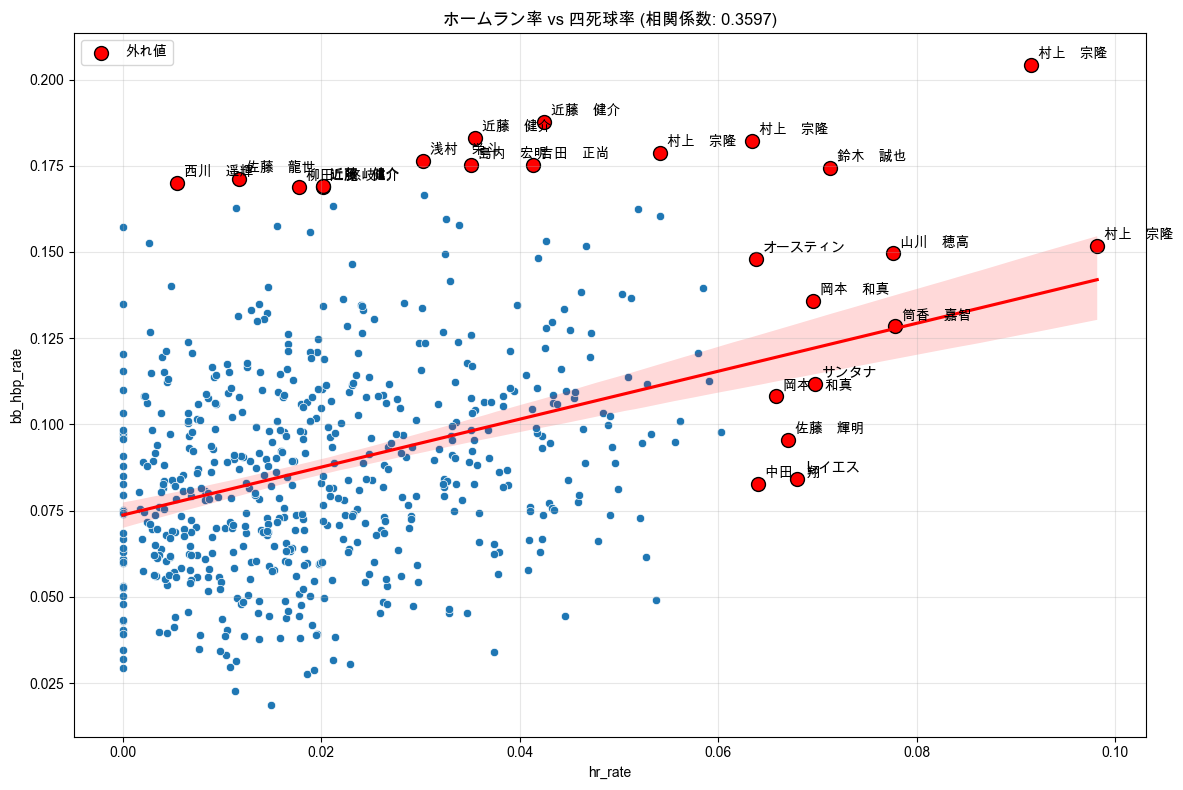


外れ値の選手:
      season_year team_name player_name   pa  hr   bb  hbp   hr_rate  \
2882         2025      ヤクルト       村上　宗隆  224  22   32    2  0.098214   
780          2022      ヤクルト       村上　宗隆  612  56  118    7  0.091503   
2923         2025      DeNA       筒香　嘉智  257  20   33    0  0.077821   
1053         2022        西武       山川　穂高  528  41   68   11  0.077652   
297          2021        広島       鈴木　誠也  533  38   87    6  0.071295   
807          2022      ヤクルト        サンタナ  215  15   23    1  0.069767   
1425         2023        巨人       岡本　和真  589  41   72    8  0.069610   
2533         2024      日本ハム        レイエス  368  25   31    0  0.067935   
3083         2025        阪神       佐藤　輝明  597  40   57    0  0.067002   
20           2021        巨人       岡本　和真  592  39   57    7  0.065878   
694          2022        巨人        中田　翔  375  24   27    4  0.064000   
167          2021      DeNA      オースティン  439  28   60    5  0.063781   
88           2021      ヤクルト       村上　宗隆  615  39  106  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv('stats_bat.csv', encoding='cp932')

# 必要な列を抽出
df_selected = df[['season_year', 'team_name', 'player_name', 'pa', 'ab', 'hr', 'bb', 'hbp']]

# 200打席以上の選手だけを選択
df_filtered = df_selected[df_selected['pa'] >= 200].copy()

# ホームラン率(HR/PA)と四死球率((BB+HBP)/PA)を計算
df_filtered.loc[:, 'hr_rate'] = df_filtered['hr'] / df_filtered['pa']
df_filtered.loc[:, 'bb_hbp_rate'] = (df_filtered['bb'] + df_filtered['hbp']) / df_filtered['pa']

# 相関係数を計算
correlation = df_filtered['hr_rate'].corr(df_filtered['bb_hbp_rate'])
print(f"ホームラン率と四死球率の相関係数: {correlation:.4f}")

# 散布図の作成
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hr_rate', y='bb_hbp_rate', data=df_filtered)
plt.title(f'ホームラン率 vs 四死球率 (相関係数: {correlation:.4f})')
plt.xlabel('ホームラン率 (HR/PA)')
plt.ylabel('四死球率 ((BB+HBP)/PA)')

# 回帰直線の追加
sns.regplot(x='hr_rate', y='bb_hbp_rate', data=df_filtered, scatter=False, color='red')

# 外れ値の検出（Z-scoreを使用）
df_filtered.loc[:, 'hr_rate_zscore'] = np.abs(stats.zscore(df_filtered['hr_rate']))
df_filtered.loc[:, 'bb_hbp_rate_zscore'] = np.abs(stats.zscore(df_filtered['bb_hbp_rate']))

# Z-score > 2.5を外れ値とする
outliers = df_filtered[(df_filtered['hr_rate_zscore'] > 2.5) | (df_filtered['bb_hbp_rate_zscore'] > 2.5)]

# 外れ値を散布図に追加
if not outliers.empty:
    plt.scatter(outliers['hr_rate'], outliers['bb_hbp_rate'], color='red', s=100, edgecolor='black', label='外れ値')
    
    # 外れ値の選手名をプロット
    for i, row in outliers.iterrows():
        plt.annotate(row['player_name'], 
                    (row['hr_rate'], row['bb_hbp_rate']),
                    xytext=(5, 5), 
                    textcoords='offset points')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 外れ値の選手の詳細情報を表示
if not outliers.empty:
    print("\n外れ値の選手:")
    outliers_info = outliers[['season_year', 'team_name', 'player_name', 'pa', 'hr', 'bb', 'hbp', 'hr_rate', 'bb_hbp_rate']]
    outliers_info = outliers_info.sort_values(by=['hr_rate', 'bb_hbp_rate'], ascending=False)
    print(outliers_info)
else:
    print("\n外れ値の選手は見つかりませんでした。")

# 12球団ごとのホームラン率と四死球率の平均を計算
team_stats = df_filtered.groupby('team_name').agg({
    'hr_rate': 'mean',
    'bb_hbp_rate': 'mean',
    'player_name': 'count'
}).rename(columns={'player_name': '選手数'}).reset_index()

print("\n12球団のホームラン率と四死球率の平均:")
print(team_stats.sort_values(by='hr_rate', ascending=False))